# How Bright Stars Were Selected

I first performed a Gaia ADQL query to select bright stars within a dec range with RUWE < 1.2. This RUWE cut does not guarantee single stars since it only probes a subset of binary separation/luminosity ratio space (see El-Badry et al. 2024 Fig 1), but it will decrease the number likely to be on the edge of resolved and look blob-y on sky.

# Query
Query all objects in Gaia with continuous spectra, low RUWE, and within 15 deg of LCO declination. Include only one with continuous spectra to enable converying the Gaia spectra into WFS magnitudes.

I ran this query on the Gaia archive ADQL interface (because python TAP queries have a 2000 source limit). 

In [1]:
query_input = """SELECT source_id, ra, dec, pmra, pmdec, phot_g_mean_mag, bp_rp, ruwe, has_xp_continuous
                FROM gaiadr3.gaia_source WHERE
                has_xp_continuous = 'True' AND
                dec < -5 AND dec > -55 AND
                phot_g_mean_mag < 5 AND
                RUWE < 1.2
                """

#from astroquery.gaia import Gaia
#job = Gaia.launch_job(query_input)
#r = job.get_results()

#### Load results from Gaia archive ADQL interface. 
r = pd.read_csv('1730739299568O-result.csv', dtype ={'source_id':str})
r

,source_id,ra,dec,pmra,pmdec,parallax,phot_g_mean_mag,bp_rp,ruwe,has_xp_continuous
0,5899408305748518528,219.471578,-49.425958,-28.920706,-29.213251,9.348442,4.001947,-0.190720,1.141235,True
1,2940472157174944128,99.472556,-18.237520,-7.165916,-8.777130,6.787632,4.103014,1.312503,1.031607,True
2,5518235833732209536,118.325618,-48.102908,-5.679107,6.162858,1.528783,4.174099,-0.184238,1.048019,True
3,5440991156144997504,158.803364,-39.562578,-31.504189,2.619350,3.615400,4.187924,2.791997,1.030684,True
4,4825052919883631616,76.102363,-35.483166,125.971691,-42.909247,17.591152,4.194447,1.369841,1.109602,True
...,...,...,...,...,...,...,...,...,...,...
188,6816586167927675776,325.503348,-23.263280,91.684025,-95.142902,13.485332,4.984811,1.128248,0.939557,True
189,4112977922408078848,254.990472,-25.092270,5.211071,-15.899578,6.048476,4.991735,2.204937,1.086619,True
190,3011410242215060224,89.768015,-9.558458,9.575414,-46.119938,11.299821,4.998930,0.238009,1.071681,True
191,6098305973471310080,219.079095,-46.245374,-31.247339,17.232811,4.698888,4.999646,1.669282,1.186192,True


# Generate Synthetic Photometry using GaiaXpy

Next I used photometry to convert Gaia spectra into SDSS photometry to get WFS magnitude estimates.

Run the query on the Gaia archive, download the results and the continuous raw spectra.

Gaia expresses the BP/RP spectra as a function of coefficients of basis functions.  So to use the spectra you have to use the GaiaXPy tool to convert the continuous spectra into sampled spectra at a range of wavelengths.  

The convert function returns sampled spectra in pseudo-units (e s$^{-1}$ and pseudo-wavelengths)

The calibrate function returns sampled spectra in absolute units (W nm$^{-1}$ m$^{-2}$ and nm)

The generate function retrieves synthetic photometry in the filter set of your choice


https://gaia-dpci.github.io/GaiaXPy-website/tutorials.html

# Run the above query in the Gaia Archive ADQL interface
# Download the query results


![pic1](pic1.png)

# And the continuous spectra:

![pic2](pic2.png)

# And the sampled spectra:

![pic3](pic3.png)

### These files (and this notebook) are included in the Github repo for this app to enable reproducing this catalog.

# Use the continuous raw spectra to generate synthetic SDSS i band photometry:

In [3]:
from gaiaxpy import generate, PhotometricSystem

# Path to file with XP CONTINUOUS RAW data (csv, ecsv, fits, or xml)
f = 'XP_CONTINUOUS_RAW.csv'
# Select a photometric system
phot_system = [PhotometricSystem.SDSS,PhotometricSystem.SDSS_Std]

# Generate snythetic phometry in SDSS system:
synthetic_photometry = generate(f, photometric_system=phot_system)


In [4]:
synthetic_photometry.to_csv('Bright-AO-Stars-Synthetic-Photometry.csv', index=False)
synthetic_photometry

,source_id,Sdss_mag_u,Sdss_mag_g,Sdss_mag_r,Sdss_mag_i,Sdss_mag_z,Sdss_flux_u,Sdss_flux_g,Sdss_flux_r,Sdss_flux_i,...,SdssStd_flux_u,SdssStd_flux_g,SdssStd_flux_r,SdssStd_flux_i,SdssStd_flux_z,SdssStd_flux_error_u,SdssStd_flux_error_g,SdssStd_flux_error_r,SdssStd_flux_error_i,SdssStd_flux_error_z
0,5989102478619519616,5.755067,4.753345,4.562233,4.522348,4.570907,1.811228e-25,4.556822e-25,5.433838e-25,5.637166e-25,...,2.381881e-25,4.577204e-25,5.428518e-25,5.633938e-25,5.435555e-25,3.016513e-27,4.138486e-28,5.804783e-28,2.520995e-28,4.309222e-28
1,3507879565090229888,6.377998,5.030770,4.529934,4.376079,4.327418,1.020471e-25,3.529329e-25,5.597915e-25,6.450128e-25,...,1.272854e-25,3.585688e-25,5.588167e-25,6.459192e-25,6.802406e-25,1.141681e-27,2.200916e-28,6.117793e-28,3.305058e-28,6.124760e-28
2,2944471321481716224,7.978153,5.797811,4.747534,4.387583,4.171607,2.337431e-26,1.741308e-25,4.581277e-25,6.382148e-25,...,2.138519e-26,1.805745e-25,4.564387e-25,6.413545e-25,7.827252e-25,3.558263e-28,1.053251e-28,3.628949e-28,2.468492e-28,4.788095e-28
3,3185689878960742144,8.366510,6.021334,4.741537,4.257475,3.962593,1.634542e-26,1.417315e-25,4.606651e-25,7.194653e-25,...,1.284329e-26,1.483461e-25,4.584611e-25,7.243950e-25,9.518014e-25,2.924330e-28,9.747137e-29,3.790675e-28,2.399517e-28,5.528253e-28
4,6477431326619860224,7.605403,5.604990,4.718381,4.418542,4.246637,3.294873e-26,2.079716e-25,4.705953e-25,6.202732e-25,...,3.326067e-26,2.140902e-25,4.691647e-25,6.226528e-25,7.312160e-25,4.168134e-28,1.103400e-28,3.630606e-28,2.160705e-28,4.725068e-28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,2924859847973986048,4.036712,4.044914,4.530514,4.842717,5.143209,8.816883e-25,8.750527e-25,5.594928e-25,4.196753e-25,...,1.452590e-24,8.688678e-25,5.599257e-25,4.171597e-25,3.193073e-25,1.539558e-26,9.418193e-28,9.371379e-28,1.573253e-28,2.315395e-28
189,5699115357749939328,7.512182,5.628330,4.761106,4.485889,4.329223,3.590272e-26,2.035485e-25,4.524363e-25,5.829675e-25,...,3.697489e-26,2.093624e-25,4.511274e-25,5.848738e-25,6.760658e-25,3.437738e-28,9.226239e-29,2.990512e-28,1.793591e-28,3.962886e-28
190,4109030160308320128,7.015432,5.486960,4.820432,4.595452,4.502999,5.673186e-26,2.318547e-25,4.283779e-25,5.270103e-25,...,6.515238e-26,2.372309e-25,4.272858e-25,5.282430e-25,5.784202e-25,8.856953e-28,1.979881e-28,5.374413e-28,2.672068e-28,5.424166e-28
191,6521403820271516160,7.639176,5.686427,4.786995,4.470931,4.289656,3.193961e-26,1.929432e-25,4.417760e-25,5.910547e-25,...,3.183425e-26,1.988762e-25,4.403142e-25,5.934159e-25,7.029398e-25,3.367026e-28,9.534291e-29,3.198584e-28,2.175558e-28,4.237760e-28


# Using individual sampled spectra to generate magnitude in MagAO-X WFS

## Example calculation:

### Load MagAO-X WFS filter curves and Gaia G band curve:

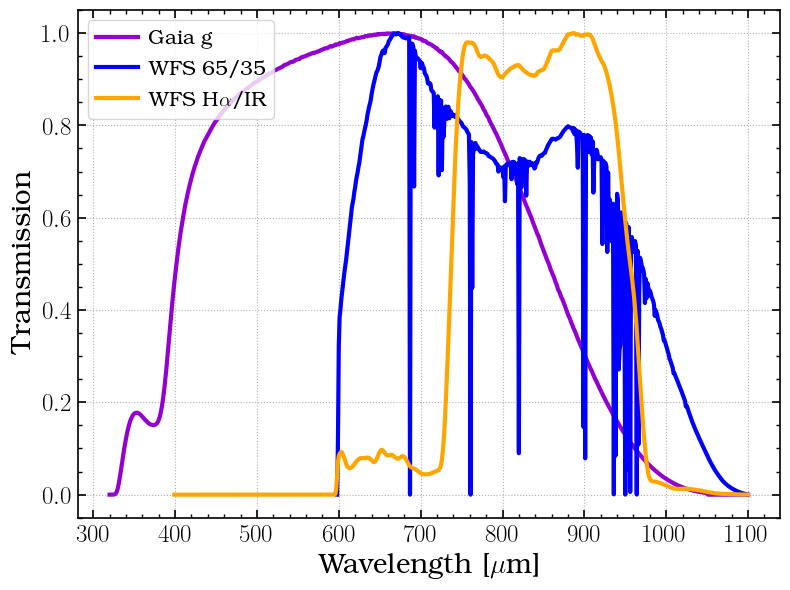

In [5]:
f6535 = pd.read_table('filter_curves/magaox_wfs-open_bs-65-35_atm.dat', comment='#', 
                  names=['wavelength [m]','transmission'], sep='\s+')
f6535['normalized transmission'] = f6535['transmission']/np.max(f6535['transmission'])
f6535['wavelength [nm]'] = f6535['wavelength [m]']*u.m.to(u.nm)

fhair = pd.read_table('filter_curves/magaox_wfs-open_bs-halpha-ir.dat', comment='#', 
                  names=['wavelength [m]','transmission'], sep='\s+')
fhair['normalized transmission'] = fhair['transmission']/np.max(fhair['transmission'])
fhair['wavelength [nm]'] = fhair['wavelength [m]']*u.m.to(u.nm)

g = pd.read_table('filter_curves/GaiaEDR3_passbands_zeropoints_version2/passband.dat', comment='#', 
                  names=['wavelength [nm]','G','eG','BP','eBP','RP','eRP'], sep='\s+')
g.loc[np.where(g['BP']==99.99)[0], 'BP'] = 0
g.loc[np.where(g['RP']==99.99)[0], 'RP'] = 0
g.loc[np.where(g['G']==99.99)[0], 'G'] = 0
g['normalized transmission'] = g['G']/np.max(g['G'])

%matplotlib inline
plt.plot(g['wavelength [nm]'], g['normalized transmission'], label='Gaia g',color='darkviolet')
plt.plot(f6535['wavelength [nm]'],f6535['normalized transmission'], label='WFS 65/35',color='blue')
plt.plot(fhair['wavelength [nm]'],fhair['normalized transmission'], 
         label=r'WFS H$\alpha$/IR',color='orange')
plt.xlabel('Wavelength [$\mu$m]')
plt.ylabel('Transmission')
plt.legend(fontsize=15,loc='upper left')
plt.tight_layout()
plt.grid(ls=':')


### Load the Gaia sampled spectrum downloaded from the archive for a single source:

In [6]:
# load individual spectrum:
single_source_spectrum = pd.read_csv('lpearce1730735985448-sampled-spectra/XP_SAMPLED-Gaia DR3 3622819624439843072.csv',
                                    dtype={'source_id':str})
single_source_spectrum

,source_id,solution_id,ra,dec,wavelength,flux,flux_error
0,3622819624439843072,4545469030156206080,196.974296,-10.740454,336.0,8.989019e-14,1.449126e-14
1,3622819624439843072,4545469030156206080,196.974296,-10.740454,338.0,8.974217e-14,1.095063e-14
2,3622819624439843072,4545469030156206080,196.974296,-10.740454,340.0,8.739168e-14,8.897407e-15
3,3622819624439843072,4545469030156206080,196.974296,-10.740454,342.0,7.167989e-14,7.729005e-15
4,3622819624439843072,4545469030156206080,196.974296,-10.740454,344.0,5.663622e-14,7.209097e-15
...,...,...,...,...,...,...,...
338,3622819624439843072,4545469030156206080,196.974296,-10.740454,1012.0,2.126632e-13,9.147954e-15
339,3622819624439843072,4545469030156206080,196.974296,-10.740454,1014.0,2.085074e-13,1.029905e-14
340,3622819624439843072,4545469030156206080,196.974296,-10.740454,1016.0,2.122904e-13,1.115871e-14
341,3622819624439843072,4545469030156206080,196.974296,-10.740454,1018.0,2.122881e-13,1.096124e-14


### Find which source this is in the catalog of downloaded sources:

In [7]:
ind = np.where(r['source_id'] == single_source_spectrum['source_id'][0])[0][0]
ind

137

### Compute $\lambda_0$ for MagAO-X WFS and Gaia G filter:

$$\lambda_0 = \frac{\int_{0}^{\infty} \lambda R(\lambda) d\lambda}{\int_{0}^{\infty} R(\lambda) d\lambda}
$$ 
Where $R(\lambda)$ is the filter response curve

In [8]:
# Determine step sizes for each filter set:
dl_f6535 = np.mean([f6535['wavelength [nm]'][i+1] - f6535['wavelength [nm]'][i] 
           for i in range(1,len(f6535['wavelength [nm]'])-1)])
dl_fhair = np.mean([fhair['wavelength [nm]'][i+1] - fhair['wavelength [nm]'][i] 
           for i in range(1,len(fhair['wavelength [nm]'])-1)])
dl_g = np.mean([g['wavelength [nm]'][i+1] - g['wavelength [nm]'][i] 
           for i in range(1,len(g['wavelength [nm]'])-1)])


In [9]:
GaiaG_lambda0 = np.sum(g['wavelength [nm]']*g['normalized transmission']* dl_g)/ \
            np.sum(g['normalized transmission']* dl_g)
f6535_lambda0 = np.sum(f6535['wavelength [nm]']*f6535['normalized transmission']* dl_f6535)/ \
            np.sum(f6535['normalized transmission']* dl_f6535)
fhair_lambda0 = np.sum(fhair['wavelength [nm]']*fhair['normalized transmission']* dl_fhair)/ \
            np.sum(fhair['normalized transmission']* dl_fhair)

## Compute flux at effective wavelength:

The flux at $\lambda_0$ is the integral of the flux times the filter response curve divided by the effective width of the filter

$$ F_\lambda(\lambda_0) \Delta\lambda = \int_{0}^{\infty} F_\lambda(\lambda) R(\lambda) d\lambda $$

In [10]:
from scipy.interpolate import interp1d

def FluxLambda0(spectrum_wavelength,spectrum_flux, lambda_0):
    from scipy.interpolate import interp1d
    # create the interpolation function:
    interpfunc = interp1d(spectrum_wavelength,spectrum_flux, fill_value="extrapolate")
    # Interpolate the filter's central wavelength in the spectrum's flux array:
    F_lambda_0 = interpfunc(lambda_0)
    return F_lambda_0

# Get the flux at Lambda_0
F_lambda0_g = FluxLambda0(single_source_spectrum['wavelength'], single_source_spectrum['flux'], GaiaG_lambda0)
F_lambda0_f6535 = FluxLambda0(single_source_spectrum['wavelength'], single_source_spectrum['flux'], f6535_lambda0)
F_lambda0_fhair = FluxLambda0(single_source_spectrum['wavelength'], single_source_spectrum['flux'], fhair_lambda0)

# Compute for Vega:
vega = pd.read_csv('vega.csv')
vega_F_lambda0_g = FluxLambda0(vega['WAVELENGTH']*u.AA.to(u.nm), vega['FLUX'], GaiaG_lambda0)
vega_F_lambda0_f6535 = FluxLambda0(vega['WAVELENGTH']*u.AA.to(u.nm), vega['FLUX'], f6535_lambda0)
vega_F_lambda0_fhair = FluxLambda0(vega['WAVELENGTH']*u.AA.to(u.nm), vega['FLUX'], fhair_lambda0)

In [11]:
# Colors:
GaiaG_to_f6535 = -2.5*np.log10(F_lambda0_g/vega_F_lambda0_g) - (-2.5*np.log10(F_lambda0_f6535/vega_F_lambda0_f6535))
GaiaG_to_fhair = -2.5*np.log10(F_lambda0_g/vega_F_lambda0_g) - (-2.5*np.log10(F_lambda0_fhair/vega_F_lambda0_fhair))

print('G_to_f6535',GaiaG_to_f6535,'G_to_fhair',GaiaG_to_fhair)
print('Mag in G:',r['phot_g_mean_mag'][ind])
print('Mag in 6535 WFS:',r['phot_g_mean_mag'][ind]-GaiaG_to_f6535)
print('Mag in HaIR WFS:',r['phot_g_mean_mag'][ind]-GaiaG_to_fhair)

G_to_f6535 0.5775996185317158 G_to_fhair 0.6840397501937421
Mag in G: 4.8242455
Mag in 6535 WFS: 4.246645881468284
Mag in HaIR WFS: 4.140205749806258


# Do it for all the sources:

In [12]:
r['WFS6535 mag'] = np.nan
r['WFSHaIR mag'] = np.nan

In [13]:
def FluxLambda0(spectrum_wavelength,spectrum_flux, lambda_0):
    from scipy.interpolate import interp1d
    # create the interpolation function:
    interpfunc = interp1d(spectrum_wavelength,spectrum_flux, fill_value="extrapolate")
    # Interpolate the filter's central wavelength in the spectrum's flux array:
    F_lambda_0 = interpfunc(lambda_0)
    return F_lambda_0

os.system('ls lpearce1730735985448-sampled-spectra/* > list')
with open('list') as f:
    z = f.read().splitlines()

f6535 = pd.read_table('filter_curves/magaox_wfs-open_bs-65-35_atm.dat', comment='#', 
                  names=['wavelength [m]','transmission'], sep='\s+')
f6535['normalized transmission'] = f6535['transmission']/np.max(f6535['transmission'])
f6535['wavelength [nm]'] = f6535['wavelength [m]']*u.m.to(u.nm)

fhair = pd.read_table('filter_curves/magaox_wfs-open_bs-halpha-ir.dat', comment='#', 
                  names=['wavelength [m]','transmission'], sep='\s+')
fhair['normalized transmission'] = fhair['transmission']/np.max(fhair['transmission'])
fhair['wavelength [nm]'] = fhair['wavelength [m]']*u.m.to(u.nm)

g = pd.read_table('filter_curves/GaiaEDR3_passbands_zeropoints_version2/passband.dat', comment='#', 
                  names=['wavelength [nm]','G','eG','BP','eBP','RP','eRP'], sep='\s+')
g.loc[np.where(g['BP']==99.99)[0], 'BP'] = 0
g.loc[np.where(g['RP']==99.99)[0], 'RP'] = 0
g.loc[np.where(g['G']==99.99)[0], 'G'] = 0
g['normalized transmission'] = g['G']/np.max(g['G'])

In [14]:
k = pd.read_csv(z[0])
# Determine step sizes for each filter set:
dl_f6535 = np.mean([f6535['wavelength [nm]'][i+1] - f6535['wavelength [nm]'][i] 
           for i in range(1,len(f6535['wavelength [nm]'])-1)])
dl_fhair = np.mean([fhair['wavelength [nm]'][i+1] - fhair['wavelength [nm]'][i] 
           for i in range(1,len(fhair['wavelength [nm]'])-1)])
dl_g = np.mean([g['wavelength [nm]'][i+1] - g['wavelength [nm]'][i] 
           for i in range(1,len(g['wavelength [nm]'])-1)])

# Determine effective wavelength:
GaiaG_lambda0 = np.sum(g['wavelength [nm]']*g['normalized transmission']* dl_g)/ \
            np.sum(g['normalized transmission']* dl_g)
f6535_lambda0 = np.sum(f6535['wavelength [nm]']*f6535['normalized transmission']* dl_f6535)/ \
            np.sum(f6535['normalized transmission']* dl_f6535)
fhair_lambda0 = np.sum(fhair['wavelength [nm]']*fhair['normalized transmission']* dl_fhair)/ \
            np.sum(fhair['normalized transmission']* dl_fhair)

# Compute for Vega:
vega = pd.read_csv('vega.csv')
vega_F_lambda0_g = FluxLambda0(vega['WAVELENGTH']*u.AA.to(u.nm), vega['FLUX'], GaiaG_lambda0)
vega_F_lambda0_f6535 = FluxLambda0(vega['WAVELENGTH']*u.AA.to(u.nm), vega['FLUX'], f6535_lambda0)
vega_F_lambda0_fhair = FluxLambda0(vega['WAVELENGTH']*u.AA.to(u.nm), vega['FLUX'], fhair_lambda0)

In [15]:
from scipy.interpolate import interp1d
from myastrotools.tools import update_progress

for j,spectrum in enumerate(z):
    k = pd.read_csv(spectrum, dtype={'source_id':str})
    i = np.where(r['source_id'] == k['source_id'][0])[0][0]
    
    # make interpolation function:
    spl = interp1d(k['wavelength'], k['flux'])
    
    # interpolate:
    F_lambda0_g = spl(GaiaG_lambda0)
    F_lambda0_f6535 = spl(f6535_lambda0)
    F_lambda0_fhair = spl(fhair_lambda0)
    
    # compute colors:
    GaiaG_to_f6535 = -2.5*np.log10(F_lambda0_g/vega_F_lambda0_g) - (-2.5*np.log10(F_lambda0_f6535/vega_F_lambda0_f6535))
    GaiaG_to_fhair = -2.5*np.log10(F_lambda0_g/vega_F_lambda0_g) - (-2.5*np.log10(F_lambda0_fhair/vega_F_lambda0_fhair))
    
    # compute mags in filters:
    r.loc[i, 'WFS6535 mag'] = r['phot_g_mean_mag'][i]-GaiaG_to_f6535
    r.loc[i, 'WFSHaIR mag'] = r['phot_g_mean_mag'][i]-GaiaG_to_fhair
    
    update_progress(j,len(z))

99.0% (192 of 193): |####################|  

### Put the GaiaXPy mags in the table:

In [16]:
synthetic_photometry = pd.read_csv('Bright-AO-Stars-Synthetic-Photometry.csv', dtype={'source_id':str})
cols = synthetic_photometry.columns
cols

Index(['source_id', 'Sdss_mag_u', 'Sdss_mag_g', 'Sdss_mag_r', 'Sdss_mag_i',
       'Sdss_mag_z', 'Sdss_flux_u', 'Sdss_flux_g', 'Sdss_flux_r',
       'Sdss_flux_i', 'Sdss_flux_z', 'Sdss_flux_error_u', 'Sdss_flux_error_g',
       'Sdss_flux_error_r', 'Sdss_flux_error_i', 'Sdss_flux_error_z',
       'SdssStd_mag_u', 'SdssStd_mag_g', 'SdssStd_mag_r', 'SdssStd_mag_i',
       'SdssStd_mag_z', 'SdssStd_flux_u', 'SdssStd_flux_g', 'SdssStd_flux_r',
       'SdssStd_flux_i', 'SdssStd_flux_z', 'SdssStd_flux_error_u',
       'SdssStd_flux_error_g', 'SdssStd_flux_error_r', 'SdssStd_flux_error_i',
       'SdssStd_flux_error_z'],
      dtype='object')

In [17]:
for col in cols[1:]:
    r[col] = np.nan

for j in range(len(r)):
    i = np.where(r['source_id'] == synthetic_photometry['source_id'][j])[0][0]
    for col in cols:
        r.loc[i, col] = synthetic_photometry[col][j]
        r.loc[i, col] = synthetic_photometry[col][j]

## Identify multiples from CMD

As another check for eliminating multiples, I used the Gai color-magnitude diagram to help select overluminous sources.

In [18]:
def GetPointsWithinARegion(xdata, ydata, points):
    ''' For a region defined by points, return the indicies of items from [xdata,ydata]
    that lie within that region
    
    Args:
        xdata, ydata (arr): x and y data 
        points (arr): array of points describing region in tuples of (x,y)
        
    Returns:
        indicies of points in dataframe that lie within the region.
    '''
    y = points[:,1]
    x = points[:,0]

    # find points that lie within region:
    stacked1 = np.stack((xdata,ydata),axis=1)
    from matplotlib import path
    p = path.Path(points)
    indicieswithinregion = p.contains_points(stacked1)
    return indicieswithinregion

For comparison, I used a CMG of stars in the Praesepe cluster from Deacon & Kraus 2021 Fig 4 (http://adsabs.harvard.edu/abs/2020MNRAS.496.5176D). This is Gaia cmd of known members of the young stellar association (and thus almost represents a ZAMS) with high RUWE and excess noise sources (indicating multiplicity) identified with triangles.  

Below I plotted the Praesepe members in orange. Multiple systems lie above the single star main sequence since they are brighter than a single star. This is born out by the high RUQE and excess noise source lying mostly above the MS.  

I plotted stars in the catalog in blue circles. I selected catalog sources within the teal region and removed them from the catalog.  This is not a fool proof method - I drew the region by eye, and likey missed many multiples and possibly discarded some singles; it also does not address possible multiples in the RGB. But it is used as a rough pass for eliminating many multiples quickly.

In [19]:
cmd = pickle.load(open('praesepe_cmd_data.pkl','rb'))
bprp, GMag, ol, an = cmd[0], cmd[1], cmd[2], cmd[3]

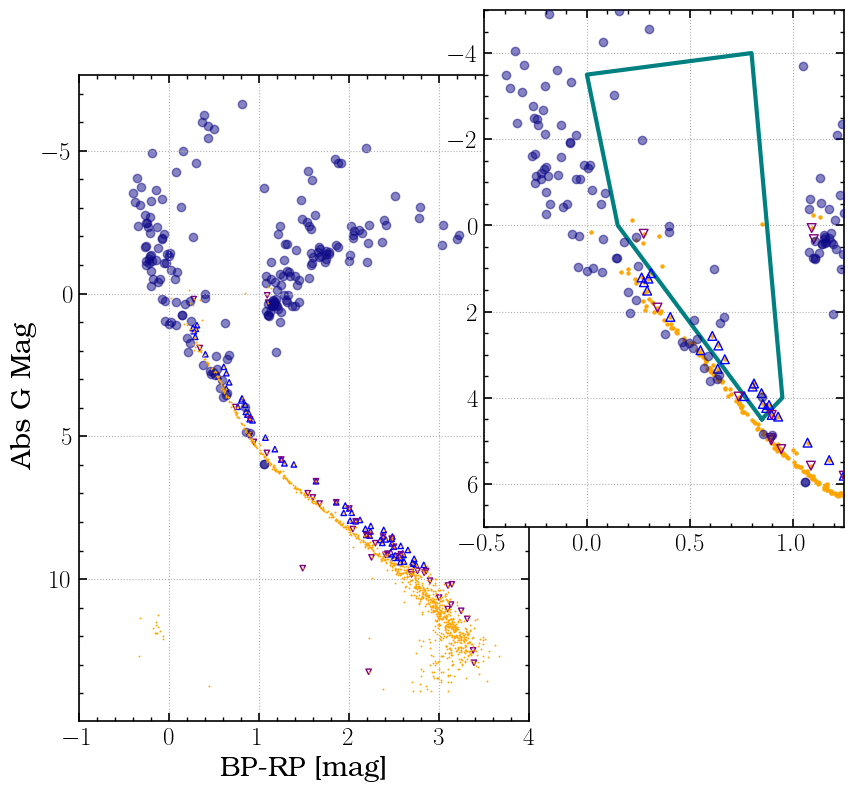

In [20]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(bprp, GMag, marker=".", ls='None',markersize=1.5, color='orange')
ax.scatter(bprp[ol], GMag[ol], marker="^", ls='None',s=15, facecolors='None',edgecolors='blue')
ax.scatter(bprp[an], GMag[an], marker="v", ls='None',s=15, facecolors='None',edgecolors='purple')


ax.scatter(r['bp_rp'], 
          r['phot_g_mean_mag'] - 5*np.log10(1000/r['parallax']) + 5,
          alpha = 0.5)



ax.invert_yaxis()
ax.set_xlim(-1,4)
ax.set_xlabel('BP-RP [mag]')
ax.set_ylabel('Abs G Mag')
ax.grid(ls=':')
#ax.legend(loc='lower left', fontsize=20)

ax = plt.gca()
axins = ax.inset_axes([0.9, 0.3, 0.8, 0.8])

axins.plot(bprp, GMag, marker=".", ls='None',markersize=5, color='orange')
axins.scatter(bprp[ol], GMag[ol], marker="^", ls='None',s=40, facecolors='None',edgecolors='blue',zorder=10)
axins.scatter(bprp[an], GMag[an], marker="v", ls='None',s=40, facecolors='None',edgecolors='purple',zorder=10)
axins.scatter(r['bp_rp'], 
          r['phot_g_mean_mag'] - 5*np.log10(1000/r['parallax']) + 5,
          alpha = 0.5, zorder=10)


points = np.array([
    [0.85,4.5] , [0.15,0], [0, -3.5], [0.8,-4], [0.95, 4], [0.85,4.5]
])
multiples = GetPointsWithinARegion(r['bp_rp'], 
          r['phot_g_mean_mag'] - 5*np.log10(1000/r['parallax']) + 5, points)
axins.plot(points[:,0], points[:,1],color='teal')

axins.set_xlim(-0.5,1.25)
axins.set_ylim(-5,7)
axins.invert_yaxis()
axins.grid(ls=':')

plt.tight_layout()
#plt.savefig('praesepe_CMD.png',dpi=300,bbox_inches='tight')

In [57]:
r_singles = r.loc[~multiples]
r_singles = r_singles.reset_index(drop=True)


Now I need to get more info about each source

### Get Simbad name, otype, and Vmag:

In [25]:
# get simbad name:
from myastrotools.tools import update_progress
from astroquery.simbad import Simbad
import warnings
warnings.filterwarnings('ignore')
simbad = Simbad()
simbad.add_votable_fields('flux(V)','ids','sptype','otype')

r_singles['simbad_name'] = np.nan
r_singles['HD'] = np.nan
r_singles['Vmag'] = np.nan
r_singles['otype'] = np.nan
for i in range(len(r_singles)):
    try:
        o = 'Gaia DR3 '+str(r_singles['source_id'][i])
        obj = simbad.query_objects([o])
        otype = obj['OTYPE']
        ids = obj['IDS'][0].split('|')
        try:
            r_singles.loc[i,'HD'] = str(list(filter(lambda x: 'HD ' in x, ids))[0])
        except:
            pass
        r_singles.loc[i,'simbad_name'] = str(ids[0]).replace('* ','')
        r_singles.loc[i,'Vmag'] = obj['FLUX_V']
        r_singles.loc[i,'otype'] = otype

    except:
        pass

    update_progress(i,len(r_singles))

99.0% (182 of 183): |####################|  

The 'otype' Simbad entry catalogs if a source is a known binary, so we can just drop those.

In [32]:
mult = []
for i in range(len(r_singles)):
    if '**' in str(r_singles.loc[i,'otype']):
        mult.append(i)
r_singles = r_singles.drop(index=mult)
r_singles = r_singles.reset_index(drop=True)

### Cut out ones fainter than 5.5 mags in either WFS filter:

In [33]:
r_final = r_singles.loc[np.where((r_singles['WFS6535 mag'] < 5.5) & (r_singles['WFSHaIR mag'] < 5.5))]
r_final = r_final.sort_values('ra')
r_final = r_final.reset_index(drop=True)
r_final.to_csv('Bright-AO-Stars.csv', index=False)
r_final

,source_id,ra,dec,pmra,pmdec,parallax,phot_g_mean_mag,bp_rp,ruwe,has_xp_continuous,...,SdssStd_flux_error_u,SdssStd_flux_error_g,SdssStd_flux_error_r,SdssStd_flux_error_i,SdssStd_flux_error_z,simbad_name,HD,Vmag,otype,OTYPE
0,2479813756210251136,26.496870,-5.733429,-10.221720,-29.187017,5.555357,4.780030,1.744846,1.010017,True,...,3.050719e-28,1.184490e-28,4.668909e-28,4.034298e-28,7.767560e-28,HD 10824,HD 10824,5.340,Star,Star
1,2461043306017773696,27.395593,-10.686824,-147.867214,-93.479828,42.584807,4.568229,0.459817,0.860792,True,...,2.253731e-27,3.909967e-28,5.926557e-28,2.484584e-28,4.664472e-28,chi Cet,HD 11171,4.680,HighPM*,HighPM*
2,5134765416778736512,29.167801,-22.526894,60.374169,-24.634717,7.328994,4.407405,1.601481,1.016402,True,...,5.273653e-28,1.932056e-28,6.989209e-28,5.122739e-28,1.064459e-27,56 Cet,HD 11930,4.850,HighPM*,HighPM*
3,5136714576016018432,29.942590,-20.824468,18.826217,15.859864,4.763460,4.662973,2.047709,0.835636,True,...,3.173615e-28,1.628789e-28,6.022030e-28,6.527044e-28,1.199097e-27,57 Cet,HD 12255,5.429,Variable*,Variable*
4,5021010046848175616,31.122699,-29.296752,1.849292,11.772053,9.403377,4.641025,-0.180284,0.866612,True,...,7.023842e-27,6.832866e-28,6.792276e-28,1.581843e-28,2.416016e-28,HD 12767,HD 12767,4.690,alf2CVnV*,alf2CVnV*
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174,6628587855877381120,335.398148,-21.598607,-10.986031,-84.833784,17.347473,4.810523,1.235893,0.761455,True,...,5.332644e-28,1.669396e-28,5.081345e-28,3.144490e-28,6.725791e-28,47 Aqr,HD 212010,5.124,RGB*,RGB*
175,6601750220152445440,337.876686,-32.346159,58.639817,-18.857117,22.083617,4.263408,0.027941,1.097547,True,...,4.844582e-27,8.518736e-28,8.559480e-28,2.914520e-28,4.536980e-28,bet PsA,HD 213398,4.290,HighPM*,HighPM*
176,6544701440869855744,340.874958,-41.414762,9.589843,-93.616195,13.415835,4.550108,1.187648,1.020501,True,...,4.917367e-28,1.282133e-28,3.597556e-28,2.088870e-28,4.053137e-28,rho Gru,HD 215104,4.835,HighPM*,HighPM*
177,6546508900546867840,342.759098,-39.156869,17.775482,-7.583302,3.627289,4.930226,1.580908,1.008365,True,...,3.695744e-28,1.376046e-28,4.210356e-28,3.214627e-28,6.583159e-28,HD 216149,HD 216149,5.400,Star,Star


# Use Simbad for brighter stars not in Gaia

Gaia has an lower magnitude limit of ~3, so the brightest stars won't be in Gaia.  We can query Simbad directly for those.  We won't be able to estimate the WFS magnitudes though since we won't have a spectrum, but I band is close.  

In [34]:
# Simbad TAP query:
from astroquery.simbad import Simbad
simbad = Simbad()
# Set max row limit to infinity so we get all the results:
simbad.ROW_LIMIT = -1
# The 'basic' table contains basic info on each star, the 'flux' table is the one with the magnitudes,
# so we can join them. Annoyingly, Simbad says "flux" when it means magnitudes.
# We can also automatically exclude binaries from the results (otype != **)
s = simbad.query_tap("""SELECT basic.ra, basic.dec, basic.oid, basic.pmra, basic.pmdec, main_id, flux, filter 
                FROM basic JOIN flux ON basic.oid = flux.oidref
                 WHERE (otype != '**') AND (flux < 3) AND (flux != 0.0)
                 AND (basic.dec < -5) AND (basic.dec > -55)
                 """)
s = s.to_pandas()


In [35]:
# How many have V mags, I mags, and i mags?
len(np.where(s['filter'] == 'V')[0]), len(np.where(s['filter'] == 'i')[0]), len(np.where(s['filter'] == 'I')[0]),

(71, 3, 161)

In [36]:
# Get V mags:
V = s.loc[np.where(s['filter'] == 'V')[0]]
V = V.reset_index(drop=True)
# V = V.drop([34,35])
# V = V.reset_index(drop=True)
V = V.sort_values('ra')
V = V.reset_index(drop=True)

In [37]:
# Get I mags:
I = s.loc[np.where(s['filter'] == 'I')[0]]
I = I.sort_values('ra')
I = I.reset_index(drop=True)

In [44]:
# Make a pandas dataframe of those:
brighter = pd.concat([V,I])
brighter = brighter.sort_values('ra')
brighter = brighter.reset_index(drop=True)
# Combine them into one.
brighter['Vmag'] = np.nan
brighter['Imag'] = np.nan
for i in range(len(brighter)):
    if brighter.loc[i,'filter'] == 'I':
        brighter.loc[i,'Imag'] = brighter.loc[i,'flux']
    elif brighter.loc[i,'filter'] == 'V':
        brighter.loc[i,'Vmag'] = brighter.loc[i,'flux']
len(brighter)

232

In [45]:
# Look for duplicate entries and drop one:
dupes = []
for i in range(len(brighter)):
    if len(np.where(brighter['oid'] == brighter['oid'][i])[0]) > 1:
        dupes.append(np.where(brighter['oid'] == brighter['oid'][i])[0])
        #print(np.where(brighter['oid'] == brighter['oid'][i])[0])

In [47]:
for d in dupes[::2]:
    if np.isnan(brighter.loc[d[0]]['Vmag']):
        brighter.loc[d[0], 'Vmag'] = brighter.loc[d[1], 'Vmag']
    if np.isnan(brighter.loc[d[0]]['Imag']):
        brighter.loc[d[0], 'Imag'] = brighter.loc[d[1], 'Imag']
    brighter = brighter.drop(index=d[1])
brighter = brighter.reset_index(drop=True)

In [48]:
# Double check we got them all:
dupes = []
for i in range(len(brighter)):
    if len(np.where(brighter['oid'] == brighter['oid'][i])[0]) > 1:
        dupes.append(np.where(brighter['oid'] == brighter['oid'][i])[0])
        #print(np.where(brighter['oid'] == brighter['oid'][i])[0])
dupes

[]

In [58]:
# Simplfy some of the simbad names by removing the leading '*', which make future querying difficult.
for i in range(len(brighter)):
    brighter.loc[i,'main_id'] = str(brighter.loc[i,'main_id']).replace('* ','')

In [49]:
# Eliminate the ones that don't have proper motions, since that's needed for the TCS catalog:
no_pm = []
for i in range(len(brighter)):
    if np.isnan(brighter.loc[i,'pmra']):
        no_pm.append(i)
    elif np.isnan(brighter.loc[i,'pmdec']):
        no_pm.append(i)

brighter = brighter.drop(index=no_pm)
brighter = brighter.reset_index(drop=True)

## Make useful database:

In [50]:
r_out = r_final[
    ['simbad_name', 'ra', 'dec', 'Vmag', 'Sdss_mag_i', 'WFS6535 mag',
       'WFSHaIR mag', 'phot_g_mean_mag', 'pmra', 'pmdec', 'parallax',
       'bp_rp','source_id']
]
r_out['vetted'] = 'N'
r_out['n_sys'] = 1
r_out['Imag'] = r_out['Sdss_mag_i']
r_out = r_out[
    ['simbad_name', 'ra', 'dec', 'Vmag', 'Imag', 'WFS6535 mag',
       'WFSHaIR mag', 'phot_g_mean_mag', 'pmra', 'pmdec', 'parallax',
       'bp_rp','source_id']
]
r_out

,simbad_name,ra,dec,Vmag,Imag,WFS6535 mag,WFSHaIR mag,phot_g_mean_mag,pmra,pmdec,parallax,bp_rp,source_id
0,HD 10824,26.496870,-5.733429,5.340,4.305772,3.953154,3.812200,4.780030,-10.221720,-29.187017,5.555357,1.744846,2479813756210251136
1,chi Cet,27.395593,-10.686824,4.680,4.632586,4.325820,4.295802,4.568229,-147.867214,-93.479828,42.584807,0.459817,2461043306017773696
2,56 Cet,29.167801,-22.526894,4.850,3.980295,3.669143,3.540811,4.407405,60.374169,-24.634717,7.328994,1.601481,5134765416778736512
3,57 Cet,29.942590,-20.824468,5.429,4.111464,3.613912,3.437497,4.662973,18.826217,15.859864,4.763460,2.047709,5136714576016018432
4,HD 12767,31.122699,-29.296752,4.690,5.099089,4.642039,4.677194,4.641025,1.849292,11.772053,9.403377,-0.180284,5021010046848175616
...,...,...,...,...,...,...,...,...,...,...,...,...,...
174,47 Aqr,335.398148,-21.598607,5.124,4.504360,4.247096,4.141161,4.810523,-10.986031,-84.833784,17.347473,1.235893,6628587855877381120
175,bet PsA,337.876686,-32.346159,4.290,4.592107,4.187389,4.209581,4.263408,58.639817,-18.857117,22.083617,0.027941,6601750220152445440
176,rho Gru,340.874958,-41.414762,4.835,4.268914,4.011698,3.908653,4.550108,9.589843,-93.616195,13.415835,1.187648,6544701440869855744
177,HD 216149,342.759098,-39.156869,5.400,4.508897,4.206003,4.079573,4.930226,17.775482,-7.583302,3.627289,1.580908,6546508900546867840


In [51]:
brighter_out = pd.DataFrame(columns=['simbad_name', 'ra', 'dec', 'Vmag', 'Imag','Sdss_mag_i', 'WFS6535 mag',
       'WFSHaIR mag', 'phot_g_mean_mag', 'pmra', 'pmdec', 'parallax',
       'bp_rp','source_id'])
brighter_out['simbad_name'] =  brighter['main_id']
brighter_out['ra'] = brighter['ra']
brighter_out['dec'] = brighter['dec']
brighter_out['Vmag'] = brighter['Vmag']
brighter_out['Imag'] = brighter['Imag']
brighter_out['pmra'] = brighter['pmra']
brighter_out['pmdec'] = brighter['pmdec']
for col in ['Sdss_mag_i', 'WFS6535 mag',
       'WFSHaIR mag', 'phot_g_mean_mag','parallax',
       'bp_rp','source_id']:
    brighter_out[col] = np.nan

In [52]:
r_out_out = pd.concat([r_out, brighter_out], axis=0)
r_out_out = r_out_out.sort_values('ra')
r_out_out = r_out_out.reset_index(drop=True)
r_out_out

,simbad_name,ra,dec,Vmag,Imag,WFS6535 mag,WFSHaIR mag,phot_g_mean_mag,pmra,pmdec,parallax,bp_rp,source_id,Sdss_mag_i
0,30 Psc,0.490081,-6.014071,NaN,1.440000,NaN,NaN,NaN,46.941000,-40.471000,NaN,NaN,NaN,NaN
1,eps Phe,2.352667,-45.747424,NaN,2.590000,NaN,NaN,NaN,120.393000,-179.597000,NaN,NaN,NaN,NaN
2,7 Cet,3.660070,-18.932863,NaN,1.920000,NaN,NaN,NaN,-26.458000,-73.450000,NaN,NaN,NaN,NaN
3,iot Cet,4.856977,-8.823919,NaN,2.110000,NaN,NaN,NaN,-14.610000,-36.668000,NaN,NaN,NaN,NaN
4,alf Phe,6.571048,-42.305987,2.380,NaN,NaN,NaN,NaN,233.050000,-356.300000,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354,phi Aqr,348.580659,-6.049006,NaN,1.860000,NaN,NaN,NaN,36.575000,-195.441000,NaN,NaN,NaN,NaN
355,psi01 Aqr,348.972892,-9.087735,NaN,2.900000,NaN,NaN,NaN,369.477000,-16.981000,NaN,NaN,NaN,NaN
356,b01 Aqr,350.742608,-20.100582,NaN,2.560000,NaN,NaN,NaN,-121.078000,-97.781000,NaN,NaN,NaN,NaN
357,b02 Aqr,351.511608,-20.642018,NaN,2.460000,NaN,NaN,NaN,-51.118000,-63.995000,NaN,NaN,NaN,NaN


In [53]:
r_out_out['ra_hms'], r_out_out['dec_dms'] = np.nan, np.nan
from astropy.coordinates import SkyCoord
for i in range(len(r_out_out)):
    ob = SkyCoord(ra = r_out_out['ra'][i], dec = r_out_out['dec'][i], frame="icrs", unit="deg")
    # convert to string in hms and dms, and split the string in to [ra,dec]
    o = ob.to_string('hmsdms').split(' ')
    o = [o[i].replace('h',':') for i in [0,1]]
    o = [o[i].replace('m',':') for i in [0,1]]
    o = [o[i].replace('s','') for i in [0,1]]
    o = [o[i].replace('d',':') for i in [0,1]]
    # put into table:
    r_out_out.loc[i,'ra_hms'], r_out_out.loc[i,'dec_dms'] = o[0][:11],o[1][:12]

r_out_out['vetted'] = 'N'
r_out_out['n_sys'] = 1
r_out_out = r_out_out[['simbad_name','ra_hms', 'dec_dms','Vmag', 'Imag', 'WFS6535 mag',
       'WFSHaIR mag', 'phot_g_mean_mag', 'vetted', 'n_sys','pmra', 'pmdec', 'parallax',
       'bp_rp','source_id', 'ra', 'dec']]
r_out_out

,simbad_name,ra_hms,dec_dms,Vmag,Imag,WFS6535 mag,WFSHaIR mag,phot_g_mean_mag,vetted,n_sys,pmra,pmdec,parallax,bp_rp,source_id,ra,dec
0,30 Psc,00:01:57.61,-06:00:50.65,NaN,1.440000,NaN,NaN,NaN,N,1,46.941000,-40.471000,NaN,NaN,NaN,0.490081,-6.014071
1,eps Phe,00:09:24.64,-45:44:50.72,NaN,2.590000,NaN,NaN,NaN,N,1,120.393000,-179.597000,NaN,NaN,NaN,2.352667,-45.747424
2,7 Cet,00:14:38.41,-18:55:58.30,NaN,1.920000,NaN,NaN,NaN,N,1,-26.458000,-73.450000,NaN,NaN,NaN,3.660070,-18.932863
3,iot Cet,00:19:25.67,-08:49:26.10,NaN,2.110000,NaN,NaN,NaN,N,1,-14.610000,-36.668000,NaN,NaN,NaN,4.856977,-8.823919
4,alf Phe,00:26:17.05,-42:18:21.55,2.380,NaN,NaN,NaN,NaN,N,1,233.050000,-356.300000,NaN,NaN,NaN,6.571048,-42.305987
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354,phi Aqr,23:14:19.35,-06:02:56.42,NaN,1.860000,NaN,NaN,NaN,N,1,36.575000,-195.441000,NaN,NaN,NaN,348.580659,-6.049006
355,psi01 Aqr,23:15:53.49,-09:05:15.84,NaN,2.900000,NaN,NaN,NaN,N,1,369.477000,-16.981000,NaN,NaN,NaN,348.972892,-9.087735
356,b01 Aqr,23:22:58.22,-20:06:02.09,NaN,2.560000,NaN,NaN,NaN,N,1,-121.078000,-97.781000,NaN,NaN,NaN,350.742608,-20.100582
357,b02 Aqr,23:26:02.78,-20:38:31.26,NaN,2.460000,NaN,NaN,NaN,N,1,-51.118000,-63.995000,NaN,NaN,NaN,351.511608,-20.642018


In [54]:
for i in range(len(r_out_out)):
    if np.isnan(r_out_out.loc[i,'pmra']):
        print(i)
    elif np.isnan(r_out_out.loc[i,'pmdec']):
        print(i)

In [55]:
r_out_out = r_out_out.drop(index=[238,74,106,113,116,166,205,301,335])
r_out_out = r_out_out.reset_index(drop=True)

In [56]:
r_out_out['Num'] = np.arange(1,len(r_out_out)+1,1)
r_out_out.to_csv('Bright-AO-Stars.csv', index=False)

## Plot of RA/Dec/RUWE of selected stars:

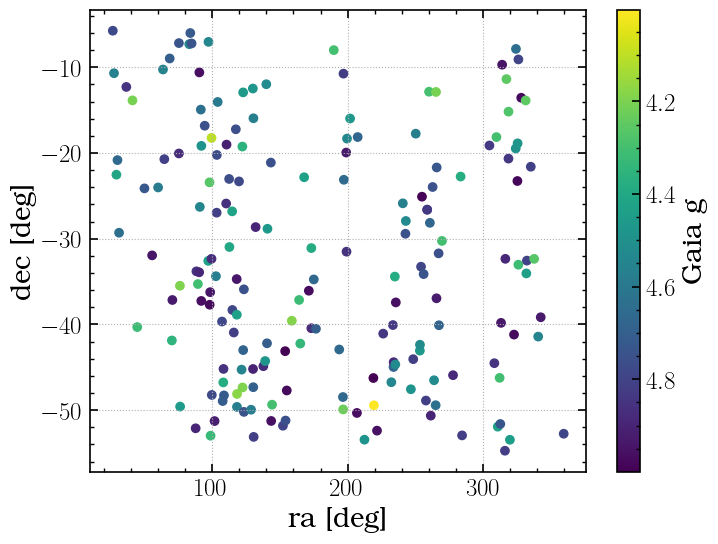

In [38]:
%matplotlib inline
plt.scatter(r_out['ra'],r_out['dec'], c=r_out['phot_g_mean_mag'], cmap='viridis_r',vmin=min(r_out['phot_g_mean_mag']))
cbar = plt.colorbar()
cbar.ax.invert_yaxis()
cbar.ax.set_ylabel('Gaia g')
plt.xlabel('ra [deg]')
plt.ylabel('dec [deg]')
plt.grid(ls=':')

# Put catalog into TCS catalog format

In [215]:
import warnings
warnings.filterwarnings('ignore')
pdcat = r_out_out.copy()
#pdcat['RA deg'],pdcat['Dec deg'] = np.nan,np.nan
pdcat['pmra s/yr'], pdcat['pmdec arcsec/yr'] = np.nan, np.nan

from astropy.coordinates import Angle
## convert pmra in mas/yr into s/yr and pmdec in mas/yr to arcsec/yr:
# For each object:
for i in range(len(pdcat)):
    # Create an astropy angl object:
    a = Angle(pdcat['pmra'][i],u.mas)
    # Convert to hms:
    a2 = a.hms
    # add up the seconds (a2[0] and a2[1] are most likely 0 but just in case):
    a3 = a2[0]*u.hr.to(u.s) + a2[1]*u.min.to(u.s) + a2[2]
    # put into table:
    pdcat['pmra s/yr'][i] = a3
    
    # Dec is easier:
    a = pdcat['pmdec'][i]*u.mas.to(u.arcsec)
    # put into table:
    pdcat['pmdec arcsec/yr'][i] = a
    
ind = np.argsort(pdcat['ra'])
pdcat = pdcat.loc[ind]
pdcat = pdcat.reset_index(drop=True)

pdcat['num'] = np.arange(1,len(pdcat)+1,1)
pdcat['Name'] = pdcat['simbad_name']

# pdcat['# Notes'] = np.nan
# for i in range(len(pdcat)):

#     pdcat['# Notes'][i] =\
#          '# WFS 65/35 mag: '+str(np.round(pdcat['WFS6535 mag'][i],decimals=2)) +\
#          ', WFS Ha/IR mag: '+str(np.round(pdcat['WFSHaIR mag'][i], decimals=2)) +\
#          ', Gaia g: '+str(np.round(pdcat['phot_g_mean_mag'][i], decimals=2)) +\
#          ', RUWE: '+str(pdcat['ruwe'][i])    

pdcat


,simbad_name,ra_hms,dec_dms,Vmag,Imag,WFS6535 mag,WFSHaIR mag,phot_g_mean_mag,vetted,n_sys,...,parallax,bp_rp,source_id,ra,dec,Num,pmra s/yr,pmdec arcsec/yr,num,Name
0,* 30 Psc,00:01:57.61,-06:00:50.65,NaN,1.440000,NaN,NaN,NaN,N,1,...,NaN,NaN,NaN,0.490081,-6.014071,1,NaN,NaN,1,* 30 Psc
1,* eps Phe,00:09:24.64,-45:44:50.72,NaN,2.590000,NaN,NaN,NaN,N,1,...,NaN,NaN,NaN,2.352667,-45.747424,2,NaN,NaN,2,* eps Phe
2,[KIS2018] A2744 46.3,00:14:18.60,-30:24:31.35,NaN,1.700000,NaN,NaN,NaN,N,1,...,NaN,NaN,NaN,3.577530,-30.408710,3,NaN,NaN,3,[KIS2018] A2744 46.3
3,[KIS2018] A2744 46.1,00:14:22.80,-30:24:02.7,NaN,2.100000,NaN,NaN,NaN,N,1,...,NaN,NaN,NaN,3.595020,-30.400750,4,NaN,NaN,4,[KIS2018] A2744 46.1
4,* 7 Cet,00:14:38.41,-18:55:58.30,NaN,1.920000,NaN,NaN,NaN,N,1,...,NaN,NaN,NaN,3.660070,-18.932863,5,NaN,NaN,5,* 7 Cet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,* phi Aqr,23:14:19.35,-06:02:56.42,NaN,1.860000,NaN,NaN,NaN,N,1,...,NaN,NaN,NaN,348.580659,-6.049006,356,NaN,NaN,356,* phi Aqr
356,* psi01 Aqr,23:15:53.49,-09:05:15.84,NaN,2.900000,NaN,NaN,NaN,N,1,...,NaN,NaN,NaN,348.972892,-9.087735,357,NaN,NaN,357,* psi01 Aqr
357,* b01 Aqr,23:22:58.22,-20:06:02.09,NaN,2.560000,NaN,NaN,NaN,N,1,...,NaN,NaN,NaN,350.742608,-20.100582,358,NaN,NaN,358,* b01 Aqr
358,* b02 Aqr,23:26:02.78,-20:38:31.26,NaN,2.460000,NaN,NaN,NaN,N,1,...,NaN,NaN,NaN,351.511608,-20.642018,359,NaN,NaN,359,* b02 Aqr


In [217]:
pdcat_out = pdcat[['num','Name','ra','dec']]
pdcat_out['Equinox'] = 2000.0
pdcat_out['pmra'] = pdcat['pmra s/yr']
pdcat_out['pmdec'] = pdcat['pmdec arcsec/yr'] 
pdcat_out['rotang'] = 0
pdcat_out['rot_mode'] = 'GRV'
pdcat_out['RA_probe1'],pdcat_out['Dec_probe1'] = '00:00:00.00',  '+00:00:00.0'
pdcat_out['equinox'] = 2000.0
pdcat_out['RA_probe2'],pdcat_out['Dec_probe2'] = '00:00:00.00',  '+00:00:00.0'
pdcat_out['equinox '] = 2000.0
pdcat_out['epoch'] = 2000.0
#pdcat_out['# Notes'] = pdcat['# Notes']

# pdcat_out.to_csv('Bright_AO_stars_cat.cat', index=False, sep='\t')
# pdcat_out.to_csv('Bright_AO_stars_cat.csv', index=False)

In [218]:
pdcat_writeto = pdcat_out.to_csv(index=False, sep='\t')
pdcat_writeto

'num\tName\tra\tdec\tEquinox\tpmra\tpmdec\trotang\trot_mode\tRA_probe1\tDec_probe1\tequinox\tRA_probe2\tDec_probe2\tequinox \tepoch\n1\t*  30 Psc\t0.49008113222000005\t-6.01407055668\t2000.0\t\t\t0\tGRV\t00:00:00.00\t+00:00:00.0\t2000.0\t00:00:00.00\t+00:00:00.0\t2000.0\t2000.0\n2\t* eps Phe\t2.3526670558199996\t-45.74742390816\t2000.0\t\t\t0\tGRV\t00:00:00.00\t+00:00:00.0\t2000.0\t00:00:00.00\t+00:00:00.0\t2000.0\t2000.0\n3\t[KIS2018] A2744 46.3\t3.57753\t-30.40871\t2000.0\t\t\t0\tGRV\t00:00:00.00\t+00:00:00.0\t2000.0\t00:00:00.00\t+00:00:00.0\t2000.0\t2000.0\n4\t[KIS2018] A2744 46.1\t3.59502\t-30.40075\t2000.0\t\t\t0\tGRV\t00:00:00.00\t+00:00:00.0\t2000.0\t00:00:00.00\t+00:00:00.0\t2000.0\t2000.0\n5\t*   7 Cet\t3.6600704726100006\t-18.932863353932504\t2000.0\t\t\t0\tGRV\t00:00:00.00\t+00:00:00.0\t2000.0\t00:00:00.00\t+00:00:00.0\t2000.0\t2000.0\n6\t* iot Cet\t4.856976645352915\t-8.82391915982472\t2000.0\t\t\t0\tGRV\t00:00:00.00\t+00:00:00.0\t2000.0\t00:00:00.00\t+00:00:00.0\t2000.0\t